# Introducción al Análisis Exploratorio de Datos con Pandas: Operaciones Avanzadas

El objetivo de este notebook es introducir algunas operaciones avanzadas que podemos realizar sobre dataframes. Estas operaciones permitiran convertir completamente el formato del dataframe en cuestion facilitando distintos analisis que podemos realizar sobre los datos asi como visualizaciones.


## Temario

Estos son algunos de los temas que intentaremos revisar a lo largo del analisis propuesto

- Descripcion del set de datos y analisis general de sus caractericas: Kickstarter Projects.
- Analizando propiedades especificas del set de datos
- Analizando utilizacion de memoria del dataframe
- Conversion de Datos y mejoras en uso de memoria
- Manipulando el Data Frame: Reestructurando Datos
    - Stack / Unstack
    - Pivot Table


In [115]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

## Descripcion del set de datos y analisis general de sus caractericas: Kickstarter Projects

Para comenzar a trabajar en la distintas operaciones que podemos realizar con un data frame vamos a trabajar con el siguiente set de datos:

[https://www.kaggle.com/kemical/kickstarter-projects/data](https://www.kaggle.com/kemical/kickstarter-projects/data)

Este set de datos posee informacion de unos 300000 proyectos de Kickstarter, la popular plataforma de Crowdsourcing. Utilizaremos este set de datos para poder explicar algunos conceptos de reestructuracion de datos que nos seran utiles para nuestros analisis y visualizaciones.

En particular el dataset tiene dos archivos, uno con informacion parcial recopilada anteriormente y uno con informacion hasta inicios del 2018 (con el que estaremos trabajando).

**Nota Bene:** para aquellos que quieran realizar analisis de los datos anteriores tener en cuenta que el formato de encoding se encuentra en 'Western(windows 1252)' por lo que al realizar la carga con read_csv hay que indicar el encoding como ```encoding='cp1252'```

### Carga de Informacion en un Dataframe

Pandas soporta distintas fuentes de informacion en distintos formatos (desde archivos de csv, excel, hasta fuentes remotas como urls o bases de datos, etc.). En este caso vamos a cargar la informacion desde un CSV que hemos descargado previamente de kaggle. Esto lo podemos hacer con pandas con ```read_csv```. 

Inicialmente podremos ver parte del data frame para tener idea de la estructura del mismo.

In [116]:
# %timeit sirve para evaluar el tiempo de ejecucion
projects_2017 = pd.read_csv('../data/kickstarter-projects/ks-projects-201801.csv')
projects_2017.tail()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,"50,000.00",2014-09-17 02:35:30,25.00,canceled,1,US,25.00,25.00,"50,000.00"
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,"1,500.00",2011-06-22 03:35:14,155.00,failed,5,US,155.00,155.00,"1,500.00"
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,"15,000.00",2010-07-01 19:40:30,20.00,failed,1,US,20.00,20.00,"15,000.00"
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,"15,000.00",2016-01-13 18:13:53,200.00,failed,6,US,200.00,200.00,"15,000.00"
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,"2,000.00",2011-07-19 09:07:47,524.00,failed,17,US,524.00,524.00,"2,000.00"


In [117]:
# nos da las dimensiones del data frame (rows x columns)
print(projects_2017.shape)

(378661, 15)


In [118]:
# en caso de ser una serie devuelve el numero de rows
# en caso de ser un dataframe devuelve el numero de rows x el numero de columns 
projects_2017.size

5679915

In [119]:
# podemos contar la cantidad de elementos elementos no nulos en el data frame
projects_2017.count()

ID                  378661
name                378657
category            378661
main_category       378661
currency            378661
deadline            378661
goal                378661
launched            378661
pledged             378661
state               378661
backers             378661
country             378661
usd pledged         374864
usd_pledged_real    378661
usd_goal_real       378661
dtype: int64

In [120]:
type(projects_2017["usd pledged"].count())

numpy.int64

### Analizando propiedades especificas del set de datos

Para poder comenzar a orientar nuestro analisis podemos por ejemplo querer comenzar a analizar algunas variables que nos interesan para aplicar en nuestros analisis.
Podemos por ejemplo comenzar las **categorias disponibles principales**

In [121]:
main_categories = projects_2017['main_category']

In [122]:
type(main_categories)

pandas.core.series.Series

In [123]:
# de esta forma obtenemos la cantidad de valores que hay para cada una de las main_categories 
# contando los proyectos por categoria principal
main_categories.value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

Tambien podemos interesarnos en ver los posibles valores que podemos tener de **estados de un proyectos**

In [124]:
states = projects_2017['state']
states.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

En ambos casos, podemos considerar a las variables como categoricas que podremos usar para nuestro analisis, las cuales podremos utilizar para agrupar o dividir informacion, o filtrar informacion a considerar en el mismo.


por otro lado podemos analizar la columna **launched** para entender su uso en el data set.

In [125]:
projects_2017['launched'].head()

0    2015-08-11 12:12:28
1    2017-09-02 04:43:57
2    2013-01-12 00:20:50
3    2012-03-17 03:24:11
4    2015-07-04 08:35:03
Name: launched, dtype: object

In [126]:
# generamos nuevas columnas seteando el tipo datetime
projects_2017['launched_datetime'] = pd.to_datetime(projects_2017['launched'])
# generamos una nueva columna obteniendo el año, esto los usuaremos en visualizacion.
projects_2017['year'] = projects_2017['launched_datetime'].dt.year


In [127]:
projects_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ID                 378661 non-null  int64         
 1   name               378657 non-null  object        
 2   category           378661 non-null  object        
 3   main_category      378661 non-null  object        
 4   currency           378661 non-null  object        
 5   deadline           378661 non-null  object        
 6   goal               378661 non-null  float64       
 7   launched           378661 non-null  object        
 8   pledged            378661 non-null  float64       
 9   state              378661 non-null  object        
 10  backers            378661 non-null  int64         
 11  country            378661 non-null  object        
 12  usd pledged        374864 non-null  float64       
 13  usd_pledged_real   378661 non-null  float64 

In [128]:
projects_2017['year'].value_counts()

2015    77300
2014    67745
2016    57184
2017    52200
2013    44851
2012    41165
2011    26237
2010    10519
2009     1329
2018      124
1970        7
Name: year, dtype: int64

La cual podemos ver que nos indica la fecha de lanzamiento del proyecto y que podremos utilizar para desarrollar analisis de series de tiempo.

Haciendo un analisis de algunas de las otras variables podemos tambien llegar a la conclusion de lo que representan las siguientes variables:

- **Goal**: Objetivo a obtener de recaudacion para un proyecto
- **Pledged**: Cantidad recaudada para un proyecto
- **Backers**: Cantidad de personas que invirtieron en el proyecto.

### Analizando utilizacion de memoria del dataframe

Es posible realizar un analisis de utilizacion de memoria del data frame para poder realizar mejoras en el uso de recursos.

In [129]:
# si especificamente queremos saber los datatypes que estamos utilizando.
# y por ejemplo decidir setear algunos especificamente en carga
projects_2017.dtypes

ID                            int64
name                         object
category                     object
main_category                object
currency                     object
deadline                     object
goal                        float64
launched                     object
pledged                     float64
state                        object
backers                       int64
country                      object
usd pledged                 float64
usd_pledged_real            float64
usd_goal_real               float64
launched_datetime    datetime64[ns]
year                          int64
dtype: object

In [130]:
# veamos la informacion general del dataframe con info()
# nos brinda informacion de la cantidad de rows, si tiene campos nulos y el tipo
projects_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ID                 378661 non-null  int64         
 1   name               378657 non-null  object        
 2   category           378661 non-null  object        
 3   main_category      378661 non-null  object        
 4   currency           378661 non-null  object        
 5   deadline           378661 non-null  object        
 6   goal               378661 non-null  float64       
 7   launched           378661 non-null  object        
 8   pledged            378661 non-null  float64       
 9   state              378661 non-null  object        
 10  backers            378661 non-null  int64         
 11  country            378661 non-null  object        
 12  usd pledged        374864 non-null  float64       
 13  usd_pledged_real   378661 non-null  float64 

In [131]:
# indica el uso en bytes de cada columna en bytes
# la opcion deep no permite analizar en profundidad el uso que se esta haciendo de memoria a nivel sistema
#projects_2017.memory_usage(deep=False)
(projects_2017.memory_usage(deep=False) / (1024 * 1024)).sum()

49.112342834472656

Al contar con informacion sobre las columnas del dataframe o analizandolas podemos hacer mejoras en el uso de los tipos del dataframe de tal forma de optimizar el uso de memoria. Los dtypes usados por pandas son esencialmente los dtypes de NumPy.

### Conversion de Datos y mejoras en uso de memoria

In [132]:
# por ejemplo podriamos castear especificamente una serie a un tipo categorico y verificar su dtype
# esto reduce mucho la utilizacion de memoria.
#main_categories.value_counts()
main_categories.astype('category').dtypes

CategoricalDtype(categories=['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion',
                  'Film & Video', 'Food', 'Games', 'Journalism', 'Music',
                  'Photography', 'Publishing', 'Technology', 'Theater'],
                 ordered=False)

In [133]:
# lo realiza sobre una columna del dataframe especifico
# considerar que devuelve una copia, ver el parametro 'copy'
#projects_2017.astype({'main_category':'category'}).dtypes
projects_2017.astype({'main_category':'category'}).memory_usage()

Index                    128
ID                   3029288
name                 3029288
category             3029288
main_category         379421
currency             3029288
deadline             3029288
goal                 3029288
launched             3029288
pledged              3029288
state                3029288
backers              3029288
country              3029288
usd pledged          3029288
usd_pledged_real     3029288
usd_goal_real        3029288
launched_datetime    3029288
year                 3029288
dtype: int64

In [134]:
# otra forma de realizarlo es indicar en lectura de la fuente de datos los tipos
projects = pd.read_csv('../data/kickstarter-projects/ks-projects-201801.csv', \
                            dtype={'main_category':'category','category':'category',\
                                   'country':'category'})

In [135]:
projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   ID                378661 non-null  int64   
 1   name              378657 non-null  object  
 2   category          378661 non-null  category
 3   main_category     378661 non-null  category
 4   currency          378661 non-null  object  
 5   deadline          378661 non-null  object  
 6   goal              378661 non-null  float64 
 7   launched          378661 non-null  object  
 8   pledged           378661 non-null  float64 
 9   state             378661 non-null  object  
 10  backers           378661 non-null  int64   
 11  country           378661 non-null  category
 12  usd pledged       374864 non-null  float64 
 13  usd_pledged_real  378661 non-null  float64 
 14  usd_goal_real     378661 non-null  float64 
dtypes: category(3), float64(5), int64(2), object(5)
mem

In [136]:
projects.memory_usage()

Index                   128
ID                  3029288
name                3029288
category             763714
main_category        379421
currency            3029288
deadline            3029288
goal                3029288
launched            3029288
pledged             3029288
state               3029288
backers             3029288
country              379485
usd pledged         3029288
usd_pledged_real    3029288
usd_goal_real       3029288
dtype: int64

In [137]:
# devuelve solo las columnas de tipo numerico
projects.select_dtypes('number')

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,"1,000.00",0.00,0,0.00,0.00,"1,533.95"
1,1000003930,"30,000.00","2,421.00",15,100.00,"2,421.00","30,000.00"
2,1000004038,"45,000.00",220.00,3,220.00,220.00,"45,000.00"
3,1000007540,"5,000.00",1.00,1,1.00,1.00,"5,000.00"
4,1000011046,"19,500.00","1,283.00",14,"1,283.00","1,283.00","19,500.00"
...,...,...,...,...,...,...,...
378656,999976400,"50,000.00",25.00,1,25.00,25.00,"50,000.00"
378657,999977640,"1,500.00",155.00,5,155.00,155.00,"1,500.00"
378658,999986353,"15,000.00",20.00,1,20.00,20.00,"15,000.00"
378659,999987933,"15,000.00",200.00,6,200.00,200.00,"15,000.00"


In [138]:
# devuelve solo las columnas de tipo categorico que inicializamos en el dataframe
projects.select_dtypes('category')

,category,main_category,country
0,Poetry,Publishing,GB
1,Narrative Film,Film & Video,US
2,Narrative Film,Film & Video,US
3,Music,Music,US
4,Film & Video,Film & Video,US
...,...,...,...
378656,Documentary,Film & Video,US
378657,Narrative Film,Film & Video,US
378658,Narrative Film,Film & Video,US
378659,Technology,Technology,US


In [139]:
main_categories.value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [140]:
# conversion de pd.Series a python list
counts = main_categories.value_counts().tolist()
print(counts)
print(type(counts))

[63585, 51918, 39874, 35231, 32569, 30070, 28153, 24602, 22816, 10913, 10819, 10779, 8809, 4755, 3768]
<class 'list'>


In [141]:
main_categories.value_counts().index

Index(['Film & Video', 'Music', 'Publishing', 'Games', 'Technology', 'Design',
       'Art', 'Food', 'Fashion', 'Theater', 'Comics', 'Photography', 'Crafts',
       'Journalism', 'Dance'],
      dtype='object')

In [142]:
# conversion de pd.Series a pd.DataFrame
main_categories.to_frame()

,main_category
0,Publishing
1,Film & Video
2,Film & Video
3,Music
4,Film & Video
...,...
378656,Film & Video
378657,Film & Video
378658,Film & Video
378659,Technology


## Reestructurando Datos

Para poder trabajar con nuestro set de datos es importante darle importancia a como se encuentran estructurados/presentados para poder facilitar nuestro analisis. Para ello tres principios basicos son de importancia:

- Cada variable conforma una columna
- Cada observacion representa una fila
- Cada tipo de conjunto/unidad de observaciones conforma una tabla

Para facilitar esto estaremos usando algunas funciones como:

- stack
- unstack
- pivot_table


### Stack y Unstack

Esta funcion fue nombrada por una analogia con una coleccion de libros que es reorganizada estando lado a lado en posicion horizontal (las columnas de un data frame) a estar apilados verticalmente uno encima del otro (en el indice del DataFrame).

Asumamos que tenemos un DataFrame con MultiIndices en sus filas y columnas. Realizar un Stacking de un DataFrame significa mover el indice por columna mas interno del DataFrame para que se convierta en el indice por fila mas interno del DataFrame resultante (algo asi como rotar y pivotear).

La operacion inversa se llama unstacking. Esto significa mover el indice por fila mas interno del DataFrame para que se convierta en el indice por columna mas interno del DataFrame resultante.

En la siguiente representacion grafica se puede entender mas claramente:

![title](img/stack-unstack1.png)

Podemos entonces trabajar con los siguientes ejemplos

In [143]:
projects_by_main_category = projects_2017.groupby('main_category')\
    .agg({'backers':['mean','sum'],'pledged':'mean',\
          'goal':'mean', 'category': 'count'}) 

In [144]:
projects_by_main_category.head(10)

backers                        pledged  \
                              mean       sum                 mean   
main_category                                                       
Art                          42.21   1188200             3,606.97   
Comics                      134.77   1458090             6,899.31   
Crafts                       27.28    240342             2,016.15   
Dance                        42.80    161275             3,690.80   
Design                      241.30   7255880            27,119.75   
Fashion                      61.45   1401993             6,549.03   
Film & Video                 66.02   4197577             6,362.73   
Food                         54.17   1332751             5,340.16   
Games                       321.79  11336829            21,865.17   
Journalism                   38.29    182091             3,218.09   

                              goal category  
                              mean    count  
main_category                                
Art                      40,829.18    28153  
Comics                   20,243.65    10819  
Crafts                   11,592.29     8809  
Dance                    10,321.33     3768  
Design                   46,733.63    30070  
Fashion                  24,818.25    22816  
Film & Video             84,334.01    63585  
Food                     48,693.75    24602  
Games                    50,711.30    35231  
Journalism               88,783.58     4755

In [145]:
projects_by_main_category.stack()

backers              pledged  \
main_category                                                   
Art           count                  nan                  nan   
              mean                 42.21             3,606.97   
              sum           1,188,200.00                  nan   
Comics        count                  nan                  nan   
              mean                134.77             6,899.31   
              sum           1,458,090.00                  nan   
Crafts        count                  nan                  nan   
              mean                 27.28             2,016.15   
              sum             240,342.00                  nan   
Dance         count                  nan                  nan   
              mean                 42.80             3,690.80   
              sum             161,275.00                  nan   
Design        count                  nan                  nan   
              mean                241.30            27,119.75   
              sum           7,255,880.00                  nan   
Fashion       count                  nan                  nan   
              mean                 61.45             6,549.03   
              sum           1,401,993.00                  nan   
Film & Video  count                  nan                  nan   
              mean                 66.02             6,362.73   
              sum           4,197,577.00                  nan   
Food          count                  nan                  nan   
              mean                 54.17             5,340.16   
              sum           1,332,751.00                  nan   
Games         count                  nan                  nan   
              mean                321.79            21,865.17   
              sum          11,336,829.00                  nan   
Journalism    count                  nan                  nan   
              mean                 38.29             3,218.09   
              sum             182,091.00                  nan   
Music         count                  nan                  nan   
              mean                 52.17             3,992.74   
              sum           2,708,475.00                  nan   
Photography   count                  nan                  nan   
              mean                 39.71             3,664.65   
              sum             428,078.00                  nan   
Publishing    count                  nan                  nan   
              mean                 55.97             3,638.72   
              sum           2,231,589.00                  nan   
Technology    count                  nan                  nan   
              mean                164.47            22,586.16   
              sum           5,356,513.00                  nan   
Theater       count                  nan                  nan   
              mean                 47.06             4,097.22   
              sum             513,536.00                  nan   

                                    goal             category  
main_category                                                  
Art           count                  nan            28,153.00  
              mean             40,829.18                  nan  
              sum                    nan                  nan  
Comics        count                  nan            10,819.00  
              mean             20,243.65                  nan  
              sum                    nan                  nan  
Crafts        count                  nan             8,809.00  
              mean             11,592.29                  nan  
              sum                    nan                  nan  
Dance         count                  nan             3,768.00  
              mean             10,321.33                  nan  
              sum                    nan                  nan  
Design        count                  nan            30,070.00  
              mea

In [146]:
#renombramos las columnas eliminando el multi indice
projects_by_main_category.columns = ['backers_mean', 'backers_total', 'pledged_mean', 'goal_mean', 'projects_total']
projects_by_main_category

,backers_mean,backers_total,pledged_mean,goal_mean,projects_total
main_category,,,,,
Art,42.21,1188200,"3,606.97","40,829.18",28153
Comics,134.77,1458090,"6,899.31","20,243.65",10819
Crafts,27.28,240342,"2,016.15","11,592.29",8809
Dance,42.80,161275,"3,690.80","10,321.33",3768
Design,241.30,7255880,"27,119.75","46,733.63",30070
Fashion,61.45,1401993,"6,549.03","24,818.25",22816
Film & Video,66.02,4197577,"6,362.73","84,334.01",63585
Food,54.17,1332751,"5,340.16","48,693.75",24602
Games,321.79,11336829,"21,865.17","50,711.30",35231


In [147]:
# stackeamos los valores
stacked = projects_by_main_category.stack()
stacked

main_category                
Art            backers_mean                    42.21
               backers_total            1,188,200.00
               pledged_mean                 3,606.97
               goal_mean                   40,829.18
               projects_total              28,153.00
                                        ...         
Theater        backers_mean                    47.06
               backers_total              513,536.00
               pledged_mean                 4,097.22
               goal_mean                   27,542.35
               projects_total              10,913.00
Length: 75, dtype: float64

In [148]:
stacked.unstack()

,backers_mean,backers_total,pledged_mean,goal_mean,projects_total
main_category,,,,,
Art,42.21,"1,188,200.00","3,606.97","40,829.18","28,153.00"
Comics,134.77,"1,458,090.00","6,899.31","20,243.65","10,819.00"
Crafts,27.28,"240,342.00","2,016.15","11,592.29","8,809.00"
Dance,42.80,"161,275.00","3,690.80","10,321.33","3,768.00"
Design,241.30,"7,255,880.00","27,119.75","46,733.63","30,070.00"
Fashion,61.45,"1,401,993.00","6,549.03","24,818.25","22,816.00"
Film & Video,66.02,"4,197,577.00","6,362.73","84,334.01","63,585.00"
Food,54.17,"1,332,751.00","5,340.16","48,693.75","24,602.00"
Games,321.79,"11,336,829.00","21,865.17","50,711.30","35,231.00"


In [149]:
projects_by_main_category_reshaped = projects_by_main_category.stack()

In [150]:
# nos queda un multi indice en las filas
projects_by_main_category_reshaped

main_category                
Art            backers_mean                    42.21
               backers_total            1,188,200.00
               pledged_mean                 3,606.97
               goal_mean                   40,829.18
               projects_total              28,153.00
                                        ...         
Theater        backers_mean                    47.06
               backers_total              513,536.00
               pledged_mean                 4,097.22
               goal_mean                   27,542.35
               projects_total              10,913.00
Length: 75, dtype: float64

In [151]:
projects_by_main_category_reshaped = projects_by_main_category_reshaped.reset_index()

In [152]:
projects_by_main_category_reshaped.head(10)

,main_category,level_1,0
0,Art,backers_mean,42.21
1,Art,backers_total,"1,188,200.00"
2,Art,pledged_mean,"3,606.97"
3,Art,goal_mean,"40,829.18"
4,Art,projects_total,"28,153.00"
5,Comics,backers_mean,134.77
6,Comics,backers_total,"1,458,090.00"
7,Comics,pledged_mean,"6,899.31"
8,Comics,goal_mean,"20,243.65"
9,Comics,projects_total,"10,819.00"


In [153]:
projects_by_main_category_reshaped.columns = ['main_category','statistics','values']

In [154]:
projects_by_main_category_reshaped.head(10)

,main_category,statistics,values
0,Art,backers_mean,42.21
1,Art,backers_total,"1,188,200.00"
2,Art,pledged_mean,"3,606.97"
3,Art,goal_mean,"40,829.18"
4,Art,projects_total,"28,153.00"
5,Comics,backers_mean,134.77
6,Comics,backers_total,"1,458,090.00"
7,Comics,pledged_mean,"6,899.31"
8,Comics,goal_mean,"20,243.65"
9,Comics,projects_total,"10,819.00"


## Unstack

Nos permite deshacer la accion de stack.

In [155]:
projects_by_main_category_stacked = projects_by_main_category.stack()

In [156]:
projects_by_main_category_stacked.head(10)

main_category                
Art            backers_mean                    42.21
               backers_total            1,188,200.00
               pledged_mean                 3,606.97
               goal_mean                   40,829.18
               projects_total              28,153.00
Comics         backers_mean                   134.77
               backers_total            1,458,090.00
               pledged_mean                 6,899.31
               goal_mean                   20,243.65
               projects_total              10,819.00
dtype: float64

In [157]:
projects_by_main_category_stacked.unstack() 
# toma nivel -1 del indice como default, es decir los labels backers_mean, backers_total que son devueltos como columnas


,backers_mean,backers_total,pledged_mean,goal_mean,projects_total
main_category,,,,,
Art,42.21,"1,188,200.00","3,606.97","40,829.18","28,153.00"
Comics,134.77,"1,458,090.00","6,899.31","20,243.65","10,819.00"
Crafts,27.28,"240,342.00","2,016.15","11,592.29","8,809.00"
Dance,42.80,"161,275.00","3,690.80","10,321.33","3,768.00"
Design,241.30,"7,255,880.00","27,119.75","46,733.63","30,070.00"
Fashion,61.45,"1,401,993.00","6,549.03","24,818.25","22,816.00"
Film & Video,66.02,"4,197,577.00","6,362.73","84,334.01","63,585.00"
Food,54.17,"1,332,751.00","5,340.16","48,693.75","24,602.00"
Games,321.79,"11,336,829.00","21,865.17","50,711.30","35,231.00"


In [158]:
projects_by_main_category_stacked

main_category                
Art            backers_mean                    42.21
               backers_total            1,188,200.00
               pledged_mean                 3,606.97
               goal_mean                   40,829.18
               projects_total              28,153.00
                                        ...         
Theater        backers_mean                    47.06
               backers_total              513,536.00
               pledged_mean                 4,097.22
               goal_mean                   27,542.35
               projects_total              10,913.00
Length: 75, dtype: float64

In [159]:
projects_by_main_category_stacked.unstack(0)
# toma el nivel 0 del indice, por lo cual quedan las columnas de cada categoria.

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
backers_mean,42.21,134.77,27.28,42.80,241.30,61.45,66.02,54.17,321.79,38.29,52.17,39.71,55.97,164.47,47.06
backers_total,"1,188,200.00","1,458,090.00","240,342.00","161,275.00","7,255,880.00","1,401,993.00","4,197,577.00","1,332,751.00","11,336,829.00","182,091.00","2,708,475.00","428,078.00","2,231,589.00","5,356,513.00","513,536.00"
pledged_mean,"3,606.97","6,899.31","2,016.15","3,690.80","27,119.75","6,549.03","6,362.73","5,340.16","21,865.17","3,218.09","3,992.74","3,664.65","3,638.72","22,586.16","4,097.22"
goal_mean,"40,829.18","20,243.65","11,592.29","10,321.33","46,733.63","24,818.25","84,334.01","48,693.75","50,711.30","88,783.58","16,056.36","13,003.23","29,131.46","119,712.32","27,542.35"
projects_total,"28,153.00","10,819.00","8,809.00","3,768.00","30,070.00","22,816.00","63,585.00","24,602.00","35,231.00","4,755.00","51,918.00","10,779.00","39,874.00","32,569.00","10,913.00"


In [160]:
# esto es igual a trasponer el DataFrame original
projects_by_main_category.T

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
backers_mean,42.21,134.77,27.28,42.80,241.30,61.45,66.02,54.17,321.79,38.29,52.17,39.71,55.97,164.47,47.06
backers_total,"1,188,200.00","1,458,090.00","240,342.00","161,275.00","7,255,880.00","1,401,993.00","4,197,577.00","1,332,751.00","11,336,829.00","182,091.00","2,708,475.00","428,078.00","2,231,589.00","5,356,513.00","513,536.00"
pledged_mean,"3,606.97","6,899.31","2,016.15","3,690.80","27,119.75","6,549.03","6,362.73","5,340.16","21,865.17","3,218.09","3,992.74","3,664.65","3,638.72","22,586.16","4,097.22"
goal_mean,"40,829.18","20,243.65","11,592.29","10,321.33","46,733.63","24,818.25","84,334.01","48,693.75","50,711.30","88,783.58","16,056.36","13,003.23","29,131.46","119,712.32","27,542.35"
projects_total,"28,153.00","10,819.00","8,809.00","3,768.00","30,070.00","22,816.00","63,585.00","24,602.00","35,231.00","4,755.00","51,918.00","10,779.00","39,874.00","32,569.00","10,913.00"


### Pivot & Pivot Table

La funcion de pivot es utilizada para crear una nueva tabla derivada a partir de una dada. Toma 3 argumentos con los siguientes nombres: index, columns y values. Como valores de cada uno de estos parametros, es necesario especificar el nombre de una columna de la tabla original. Luego la funcion de pivot va a crear una nueva tabla donde:

- Los indices de fila y columna son los valores unicos de los parametros respectivos.
- Los valores de las celdas de las nueva table son tomados de la columna dada en el parametro values

Dado que pivot tiene algunos aspectos a considerar en relacion a duplicados, en particular lanza una ValueError en caso de duplicados. vamos a considerar la funcion pivot_table que resuelve esto con una funcion de agregacion que se puede indicar como se ve en el siguiente ejemplo:

![title](img/pivoting_table_simple1.png)


In [161]:
projects_by_main_category_reshaped.columns

Index(['main_category', 'statistics', 'values'], dtype='object')

In [162]:
projects_by_main_category_reshaped

,main_category,statistics,values
0,Art,backers_mean,42.21
1,Art,backers_total,"1,188,200.00"
2,Art,pledged_mean,"3,606.97"
3,Art,goal_mean,"40,829.18"
4,Art,projects_total,"28,153.00"
...,...,...,...
70,Theater,backers_mean,47.06
71,Theater,backers_total,"513,536.00"
72,Theater,pledged_mean,"4,097.22"
73,Theater,goal_mean,"27,542.35"


In [163]:
# tener el cuenta el caso de pivot que no genera duplicados.
projects_by_main_category_reshaped.pivot(index='main_category',columns='statistics',values='values')

statistics,backers_mean,backers_total,goal_mean,pledged_mean,projects_total
main_category,,,,,
Art,42.21,"1,188,200.00","40,829.18","3,606.97","28,153.00"
Comics,134.77,"1,458,090.00","20,243.65","6,899.31","10,819.00"
Crafts,27.28,"240,342.00","11,592.29","2,016.15","8,809.00"
Dance,42.80,"161,275.00","10,321.33","3,690.80","3,768.00"
Design,241.30,"7,255,880.00","46,733.63","27,119.75","30,070.00"
Fashion,61.45,"1,401,993.00","24,818.25","6,549.03","22,816.00"
Film & Video,66.02,"4,197,577.00","84,334.01","6,362.73","63,585.00"
Food,54.17,"1,332,751.00","48,693.75","5,340.16","24,602.00"
Games,321.79,"11,336,829.00","50,711.30","21,865.17","35,231.00"


In [164]:
# obtenemos el mismo caso que pivot dado que no necesitamos usar una aggfunc
projects_by_main_category_reshaped.pivot_table(index='main_category',columns='statistics',values='values')

statistics,backers_mean,backers_total,goal_mean,pledged_mean,projects_total
main_category,,,,,
Art,42.21,"1,188,200.00","40,829.18","3,606.97","28,153.00"
Comics,134.77,"1,458,090.00","20,243.65","6,899.31","10,819.00"
Crafts,27.28,"240,342.00","11,592.29","2,016.15","8,809.00"
Dance,42.80,"161,275.00","10,321.33","3,690.80","3,768.00"
Design,241.30,"7,255,880.00","46,733.63","27,119.75","30,070.00"
Fashion,61.45,"1,401,993.00","24,818.25","6,549.03","22,816.00"
Film & Video,66.02,"4,197,577.00","84,334.01","6,362.73","63,585.00"
Food,54.17,"1,332,751.00","48,693.75","5,340.16","24,602.00"
Games,321.79,"11,336,829.00","50,711.30","21,865.17","35,231.00"


Veamos un potencial caso con valores duplicados y realizando una visualizacion relacionada al formato obtenido por una tabla pivot, un **Heatmap**.

In [165]:
# procesamiento de fechas de lanzamiento en mes y año
projects_2017['launched'] = pd.to_datetime(projects_2017['launched'])
projects_2017['launch_month'] = projects_2017['launched'].dt.month
projects_2017['launch_year'] = projects_2017['launched'].dt.year

In [166]:
projects_2017.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ID                 378661 non-null  int64         
 1   name               378657 non-null  object        
 2   category           378661 non-null  object        
 3   main_category      378661 non-null  object        
 4   currency           378661 non-null  object        
 5   deadline           378661 non-null  object        
 6   goal               378661 non-null  float64       
 7   launched           378661 non-null  datetime64[ns]
 8   pledged            378661 non-null  float64       
 9   state              378661 non-null  object        
 10  backers            378661 non-null  int64         
 11  country            378661 non-null  object        
 12  usd pledged        374864 non-null  float64       
 13  usd_pledged_real   378661 non-null  float64 

In [168]:
# generamos una columna para agregar y procesar mediante una tabla pivot
projects_2017['active_project'] = 1
for_heatmap = projects_2017.pivot_table(index='launch_year', columns='launch_month', values='active_project', aggfunc='sum')

In [169]:
for_heatmap

launch_month,1,2,3,4,5,6,7,8,9,10,11,12
launch_year,,,,,,,,,,,,
1970,7.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009,nan,nan,nan,19.00,74.00,75.00,78.00,115.00,348.00,194.00,218.00,208.00
2010,296.00,371.00,511.00,678.00,760.00,"1,093.00","1,067.00",967.00,"1,028.00","1,210.00","1,272.00","1,266.00"
2011,"1,594.00","1,803.00","2,025.00","2,243.00","2,288.00","2,294.00","2,368.00","2,320.00","2,151.00","2,311.00","2,612.00","2,228.00"
2012,"2,903.00","3,358.00","4,049.00","3,773.00","3,962.00","3,927.00","3,664.00","3,521.00","3,042.00","3,481.00","3,180.00","2,305.00"
2013,"3,296.00","3,359.00","3,845.00","3,991.00","4,208.00","3,853.00","3,877.00","3,514.00","3,699.00","4,097.00","4,196.00","2,916.00"
2014,"3,475.00","3,817.00","4,463.00","4,483.00","4,641.00","5,089.00","10,775.00","7,430.00","6,383.00","6,860.00","6,083.00","4,246.00"
2015,"6,669.00","7,591.00","8,144.00","7,470.00","6,970.00","6,883.00","6,011.00","5,723.00","5,959.00","5,925.00","5,884.00","4,071.00"
2016,"5,026.00","5,406.00","5,659.00","5,222.00","5,181.00","4,905.00","4,308.00","4,346.00","4,359.00","4,720.00","4,779.00","3,273.00"



Un heatmap representa en el eje Y todos los puntos, instancias (años) y en el eje X cada una de las categorias posibles (meses en este caso). Los ejes suelen ser intercambiables sin que afecte la visualizacion. 

El heatmap es entonces una matriz en donde cada celda muestra el valor que toma la variable del eje X para el punto del eje Y, tomando con valores de un cierto color cuando son mas altos y de otro cuando son mas bajos.

Text(46.25, 0.5, 'Año de Lanzamiento del Proyecto')

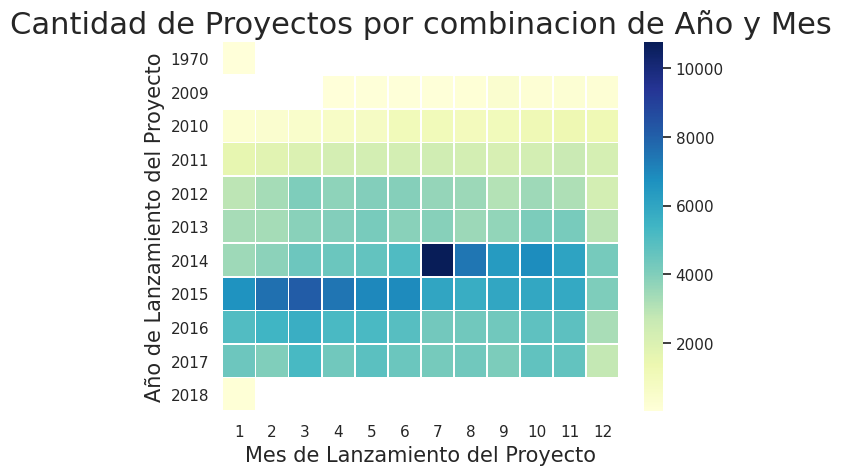

In [170]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="YlGnBu") # annot=True
g.set_title("Cantidad de Proyectos por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes de Lanzamiento del Proyecto",fontsize=15)
g.set_ylabel("Año de Lanzamiento del Proyecto", fontsize=15)

Para mas informacion al respecto es de interes el tutorial sobre estos aspectos provisto por pandas: https://pandas.pydata.org/docs/user_guide/reshaping.html